## <center>Projet VitaliTaxi</center>
## <center>Les courses de taxi New-Yorkais</center>

Modifier le format des variables liés à la date, faire durée trajet

## Partie 1 : Exploration et Préparation des données

### 1. Importation des données des courses de taxi jaunes

Pour commencer on va importer les bibliothèque nécessaires 

In [1]:
#!pip install pyarrow
#!pip install xgboost

In [2]:
import pandas as pd # bibliothèque de manipulation de données tabulaires
import numpy as np #  bibliothèque de manipulation des tableaux de données multidimensionnels
import matplotlib.pyplot as plt # bibliothèque de visualisation de données
import seaborn as sns #  bibliothèque de visualisation de données : graphiques statistiques
import pyarrow.parquet as pq

On importe les données yellow_tripdata_2023-03

In [3]:
trips = pq.read_table('yellow_tripdata_2023-03.parquet')
trips = trips.to_pandas()

print("Nombre de lignes : " , trips.shape[0])
print("Nombre de variables : ",trips.shape[1] )

Nombre de lignes :  3403766
Nombre de variables :  19


In [4]:
trips.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2023-03-01 00:06:43,2023-03-01 00:16:43,1.0,0.00,1.0,N,238,42,2,8.6,1.0,0.5,0.00,0.0,1.0,11.10,0.0,0.00
1,2,2023-03-01 00:08:25,2023-03-01 00:39:30,2.0,12.40,1.0,N,138,231,1,52.7,6.0,0.5,12.54,0.0,1.0,76.49,2.5,1.25
2,1,2023-03-01 00:15:04,2023-03-01 00:29:26,0.0,3.30,1.0,N,140,186,1,18.4,3.5,0.5,4.65,0.0,1.0,28.05,2.5,0.00
3,1,2023-03-01 00:49:37,2023-03-01 01:01:05,1.0,2.90,1.0,N,140,43,1,15.6,3.5,0.5,4.10,0.0,1.0,24.70,2.5,0.00
4,2,2023-03-01 00:08:04,2023-03-01 00:11:06,1.0,1.23,1.0,N,79,137,1,7.2,1.0,0.5,2.44,0.0,1.0,14.64,2.5,0.00


Opération sur le temps et la durée de la course ⌚

In [5]:
trips.insert(0, 'year', trips['tpep_pickup_datetime'].dt.year)
trips.insert(1, 'day', trips['tpep_pickup_datetime'].dt.day)
trips.insert(2, 'hour', trips['tpep_pickup_datetime'].dt.hour)
trips.insert(3, 'trip_duration', (trips['tpep_dropoff_datetime'] - trips['tpep_pickup_datetime']).dt.total_seconds() / 3600)
trips.head()

,year,day,hour,trip_duration,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,...,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2023,1,0,0.166667,2,2023-03-01 00:06:43,2023-03-01 00:16:43,1.0,0.00,1.0,...,2,8.6,1.0,0.5,0.00,0.0,1.0,11.10,0.0,0.00
1,2023,1,0,0.518056,2,2023-03-01 00:08:25,2023-03-01 00:39:30,2.0,12.40,1.0,...,1,52.7,6.0,0.5,12.54,0.0,1.0,76.49,2.5,1.25
2,2023,1,0,0.239444,1,2023-03-01 00:15:04,2023-03-01 00:29:26,0.0,3.30,1.0,...,1,18.4,3.5,0.5,4.65,0.0,1.0,28.05,2.5,0.00
3,2023,1,0,0.191111,1,2023-03-01 00:49:37,2023-03-01 01:01:05,1.0,2.90,1.0,...,1,15.6,3.5,0.5,4.10,0.0,1.0,24.70,2.5,0.00
4,2023,1,0,0.050556,2,2023-03-01 00:08:04,2023-03-01 00:11:06,1.0,1.23,1.0,...,1,7.2,1.0,0.5,2.44,0.0,1.0,14.64,2.5,0.00


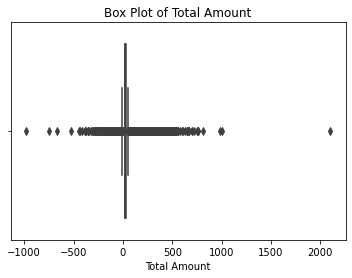

In [6]:
import seaborn as sns

sns.boxplot(x=trips['total_amount'])
plt.xlabel('Total Amount')
plt.title('Box Plot of Total Amount')
plt.show()

On remarque des valeurs aberrantes sur le coût des courses.  
On les supprime.

In [7]:
trips = trips[trips['total_amount'] <= 2000]
trips = trips[trips['total_amount'] > 0]

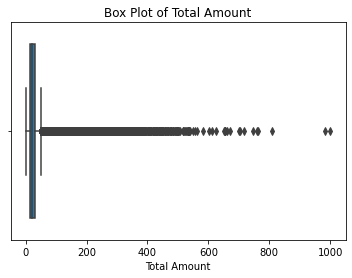

In [8]:
import seaborn as sns

sns.boxplot(x=trips['total_amount'])
plt.xlabel('Total Amount')
plt.title('Box Plot of Total Amount')
plt.show()

In [9]:
trips['total_amount'].max()

1000.0

Description des Données

In [10]:
print(trips.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3373402 entries, 0 to 3403765
Data columns (total 23 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   year                   int64         
 1   day                    int64         
 2   hour                   int64         
 3   trip_duration          float64       
 4   VendorID               int32         
 5   tpep_pickup_datetime   datetime64[ns]
 6   tpep_dropoff_datetime  datetime64[ns]
 7   passenger_count        float64       
 8   trip_distance          float64       
 9   RatecodeID             float64       
 10  store_and_fwd_flag     object        
 11  PULocationID           int32         
 12  DOLocationID           int32         
 13  payment_type           int64         
 14  fare_amount            float64       
 15  extra                  float64       
 16  mta_tax                float64       
 17  tip_amount             float64       
 18  tolls_amount          

### 2. Exploration et visualisation des données

In [11]:
trips.describe()

,year,day,hour,trip_duration,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
count,3.373402e+06,3.373402e+06,3.373402e+06,3.373402e+06,3.373402e+06,3.285836e+06,3.373402e+06,3.285836e+06,3.373402e+06,3.373402e+06,3.373402e+06,3.373402e+06,3.373402e+06,3.373402e+06,3.373402e+06,3.373402e+06,3.373402e+06,3.373402e+06,3.285836e+06,3.285836e+06
mean,2.023000e+03,1.588351e+01,1.434647e+01,2.821177e-01,1.722987e+00,1.351669e+00,3.908729e+00,1.627209e+00,1.654958e+02,1.641508e+02,1.168161e+00,1.924940e+01,1.653121e+00,4.961141e-01,3.526011e+00,5.764111e-01,9.986853e-01,2.826920e+01,2.314008e+00,1.064040e-01
std,3.471328e-02,8.985260e+00,5.754801e+00,7.316013e-01,4.601166e-01,8.874471e-01,1.924153e+02,7.386318e+00,6.374099e+01,6.967070e+01,4.890373e-01,1.778071e+01,1.828223e+00,4.431644e-02,3.997750e+00,2.117724e+00,3.299791e-02,2.226192e+01,6.560377e-01,3.488313e-01
min,2.001000e+03,1.000000e+00,0.000000e+00,-7.937500e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-1.719000e+01,0.000000e+00,-5.000000e-01,-4.420000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,2.023000e+03,8.000000e+00,1.100000e+01,1.241667e-01,1.000000e+00,1.000000e+00,1.060000e+00,1.000000e+00,1.320000e+02,1.140000e+02,1.000000e+00,9.300000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.000000e+00,1.595000e+01,2.500000e+00,0.000000e+00
50%,2.023000e+03,1.600000e+01,1.500000e+01,2.030556e-01,2.000000e+00,1.000000e+00,1.800000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.350000e+01,1.000000e+00,5.000000e-01,2.850000e+00,0.000000e+00,1.000000e+00,2.064000e+01,2.500000e+00,0.000000e+00
75%,2.023000e+03,2.400000e+01,1.900000e+01,3.277778e-01,2.000000e+00,1.000000e+00,3.390000e+00,1.000000e+00,2.330000e+02,2.340000e+02,1.000000e+00,2.120000e+01,2.500000e+00,5.000000e-01,4.340000e+00,0.000000e+00,1.000000e+00,2.985000e+01,2.500000e+00,0.000000e+00
max,2.023000e+03,3.100000e+01,2.300000e+01,9.396194e+01,6.000000e+00,9.000000e+00,2.169870e+05,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,9.599000e+02,1.375000e+01,4.000000e+00,9.843000e+02,1.770000e+02,1.000000e+00,1.000000e+03,2.500000e+00,1.250000e+00


#### 2.1 Valeurs Manquantes

Visualisation des données manquantes

<AxesSubplot:>

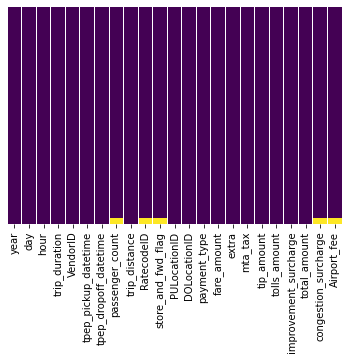

In [12]:
sns.heatmap(trips.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Compter les valeurs manquantes par variable

In [13]:
missing_values = trips.isnull().sum()
print(missing_values)

year                         0
day                          0
hour                         0
trip_duration                0
VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          87566
trip_distance                0
RatecodeID               87566
store_and_fwd_flag       87566
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     87566
Airport_fee              87566
dtype: int64


#### 2.2 Visualisation des Variables

In [14]:
trips.head()

,year,day,hour,trip_duration,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,...,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2023,1,0,0.166667,2,2023-03-01 00:06:43,2023-03-01 00:16:43,1.0,0.00,1.0,...,2,8.6,1.0,0.5,0.00,0.0,1.0,11.10,0.0,0.00
1,2023,1,0,0.518056,2,2023-03-01 00:08:25,2023-03-01 00:39:30,2.0,12.40,1.0,...,1,52.7,6.0,0.5,12.54,0.0,1.0,76.49,2.5,1.25
2,2023,1,0,0.239444,1,2023-03-01 00:15:04,2023-03-01 00:29:26,0.0,3.30,1.0,...,1,18.4,3.5,0.5,4.65,0.0,1.0,28.05,2.5,0.00
3,2023,1,0,0.191111,1,2023-03-01 00:49:37,2023-03-01 01:01:05,1.0,2.90,1.0,...,1,15.6,3.5,0.5,4.10,0.0,1.0,24.70,2.5,0.00
4,2023,1,0,0.050556,2,2023-03-01 00:08:04,2023-03-01 00:11:06,1.0,1.23,1.0,...,1,7.2,1.0,0.5,2.44,0.0,1.0,14.64,2.5,0.00


- Comptage du nombre de passagers

C:\tools\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


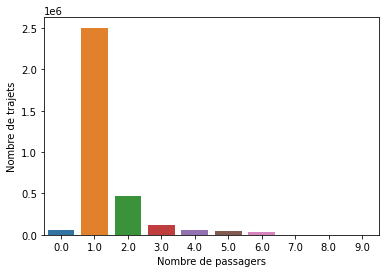

In [15]:
sns.countplot(trips["passenger_count"])
plt.xlabel("Nombre de passagers")
plt.ylabel("Nombre de trajets")
plt.show()

- Visualisation de la relation entre le type de paiement et le nombre de course

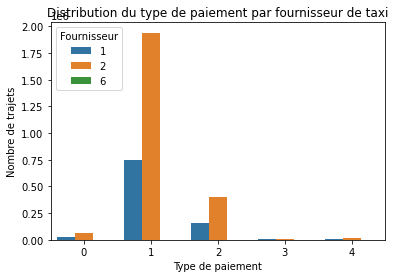

In [16]:
sns.countplot(x='payment_type', hue='VendorID', data=trips)
plt.xlabel("Type de paiement")
plt.ylabel("Nombre de trajets")
plt.title("Distribution du type de paiement par fournisseur de taxi")
plt.legend(title="Fournisseur")
plt.show()

- Observation de la distance des trajets

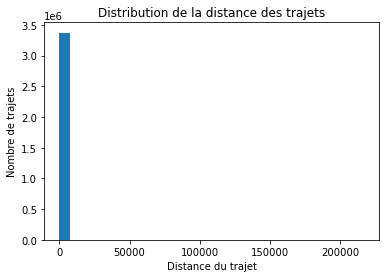

In [17]:
plt.hist(trips['trip_distance'], bins=30)
plt.xlabel('Distance du trajet')
plt.ylabel('Nombre de trajets')
plt.title('Distribution de la distance des trajets')
plt.show()

- Aperçu du nombre de trajets par fournisseur

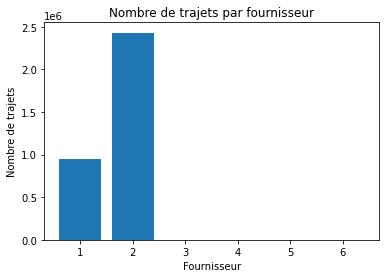

In [18]:
vendor_counts = trips['VendorID'].value_counts()
plt.bar(vendor_counts.index, vendor_counts.values)
plt.xlabel('Fournisseur')
plt.ylabel('Nombre de trajets')
plt.title('Nombre de trajets par fournisseur')
plt.show()

- Visualisation de l'heure de prise en charge

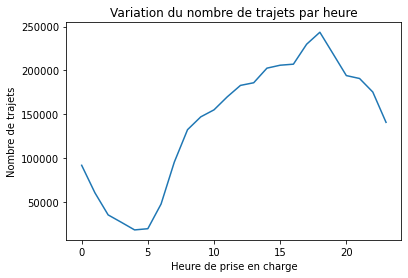

In [19]:
# Exemple avec l'heure de prise en charge
pickup_counts = trips['tpep_pickup_datetime'].dt.hour.value_counts().sort_index()
plt.plot(pickup_counts.index, pickup_counts.values)
plt.xlabel('Heure de prise en charge')
plt.ylabel('Nombre de trajets')
plt.title('Variation du nombre de trajets par heure')
plt.show()

- Observation du montant des pourboires

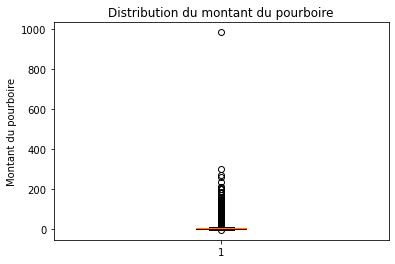

In [20]:
# Exemple avec la variable "tip_amount"
plt.boxplot(trips['tip_amount'])
plt.ylabel('Montant du pourboire')
plt.title('Distribution du montant du pourboire')
plt.show()

In [21]:
trips['tip_amount'].idxmax()

361044

In [22]:
trips = trips.drop(361044)

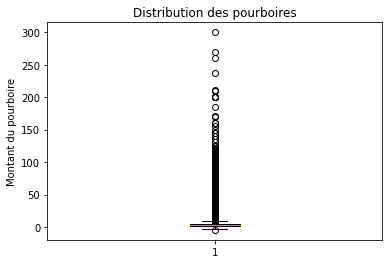

In [23]:
# Créer la figure et l'axe
fig, ax = plt.subplots()

# Tracer la boîte à moustaches
ax.boxplot(trips['tip_amount'])

# Ajouter un titre et des étiquettes d'axe
ax.set_title("Distribution des pourboires")
ax.set_ylabel("Montant du pourboire")

# Afficher la figure
plt.show()

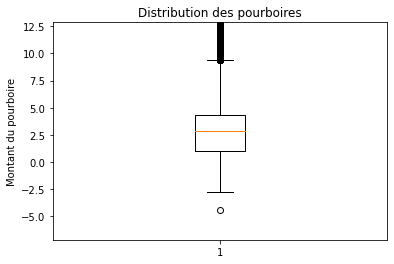

In [24]:
# Zoom sur la partie boite
fig, ax = plt.subplots()

ax.boxplot(trips['tip_amount'])
ax.set_title("Distribution des pourboires")
ax.set_ylabel("Montant du pourboire")

median = trips['tip_amount'].median()
ax.set_ylim(bottom=median - 10, top=median + 10)

plt.show()

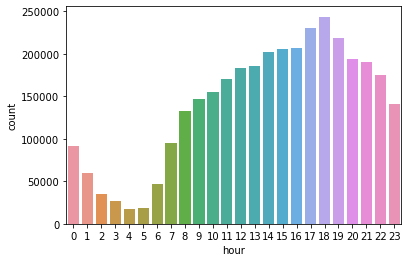

In [27]:
sns.countplot(x='hour', data=trips)
plt.show()

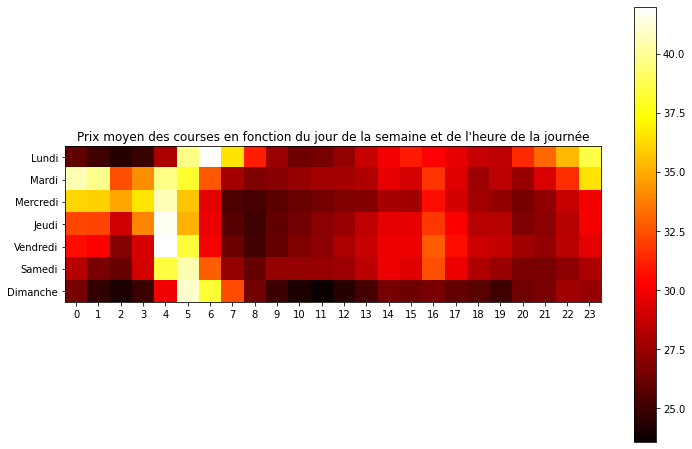

In [28]:
trips['day_of_week'] = trips['tpep_pickup_datetime'].dt.dayofweek

# Calculer le prix moyen des courses en regroupant par jour de la semaine et heure de la journée
average_price = trips.groupby(['day_of_week', 'hour'])['total_amount'].mean()

# Créer une table pivotante à partir des données
pivot_table = average_price.unstack()

# Déplacer les étiquettes des jours de la semaine pour commencer par lundi
pivot_table = pivot_table.reindex(np.roll(np.arange(7), 1))

# Créer le graphique de heatmap
fig, ax = plt.subplots(figsize=(12, 8))
im = ax.imshow(pivot_table.values, cmap='hot')

# Ajouter les étiquettes des axes
ax.set_xticks(np.arange(24))
ax.set_yticks(np.arange(7))
ax.set_xticklabels(np.arange(24))
ax.set_yticklabels(['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche'])

# Ajouter une barre de couleur
cbar = ax.figure.colorbar(im)

# Ajouter un titre
ax.set_title("Prix moyen des courses en fonction du jour de la semaine et de l'heure de la journée")

# Afficher le graphique
plt.show()

Afficher la matrice de corrélation entre les variables numériques 

AxesSubplot(0.125,0.125;0.62x0.755)


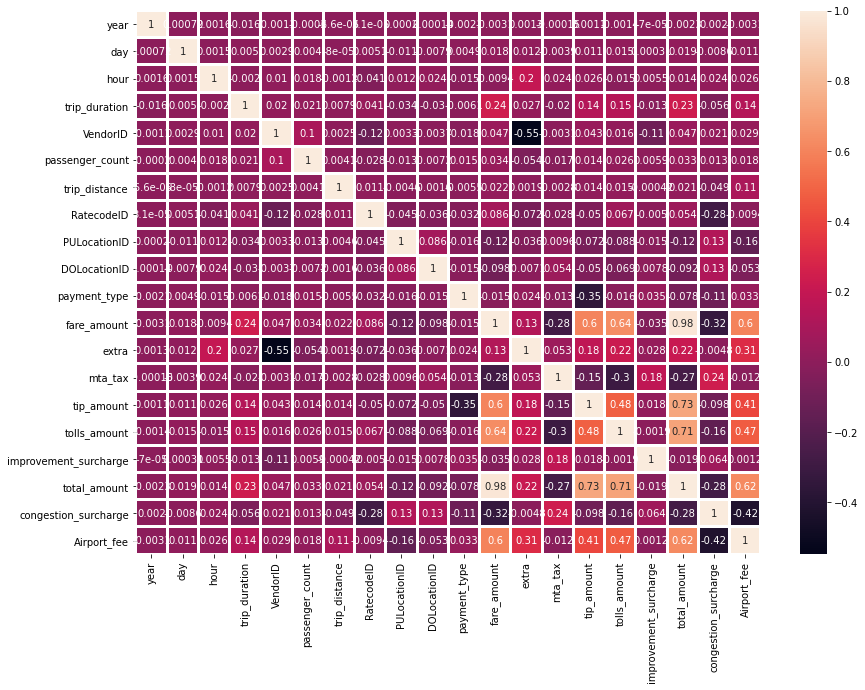

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
corr1=trips.corr(method='pearson')
fig, ax = plt.subplots(figsize=(14,10)) 
print(sns.heatmap(corr1, annot=True,linewidths=2,ax=ax))

## Partie 2 : Utilisation des modèles de prédictions

### 1. Le modèle XGBoost

In [55]:
trips.drop(['Airport_fee','congestion_surcharge','improvement_surcharge','tolls_amount','tip_amount','mta_tax','extra','fare_amount'], axis = 1, inplace = True)

trips.head()

,year,day,hour,trip_duration,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,total_amount
0,2023,1,0,0.166667,2,2023-03-01 00:06:43,2023-03-01 00:16:43,1.0,0.00,1.0,N,238,42,2,11.10
1,2023,1,0,0.518056,2,2023-03-01 00:08:25,2023-03-01 00:39:30,2.0,12.40,1.0,N,138,231,1,76.49
2,2023,1,0,0.239444,1,2023-03-01 00:15:04,2023-03-01 00:29:26,0.0,3.30,1.0,N,140,186,1,28.05
3,2023,1,0,0.191111,1,2023-03-01 00:49:37,2023-03-01 01:01:05,1.0,2.90,1.0,N,140,43,1,24.70
4,2023,1,0,0.050556,2,2023-03-01 00:08:04,2023-03-01 00:11:06,1.0,1.23,1.0,N,79,137,1,14.64


In [56]:
trips['tpep_pickup_datetime'] = pd.to_datetime(trips['tpep_pickup_datetime'], unit='s')
trips['tpep_dropoff_datetime'] = pd.to_datetime(trips['tpep_dropoff_datetime'], unit='s')

In [57]:
trips['tpep_pickup_datetime'] = trips['tpep_pickup_datetime'].dt.day
trips['tpep_dropoff_datetime'] = trips['tpep_dropoff_datetime'].dt.day

In [58]:
trips.head()

,year,day,hour,trip_duration,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,total_amount
0,2023,1,0,0.166667,2,1,1,1.0,0.00,1.0,N,238,42,2,11.10
1,2023,1,0,0.518056,2,1,1,2.0,12.40,1.0,N,138,231,1,76.49
2,2023,1,0,0.239444,1,1,1,0.0,3.30,1.0,N,140,186,1,28.05
3,2023,1,0,0.191111,1,1,1,1.0,2.90,1.0,N,140,43,1,24.70
4,2023,1,0,0.050556,2,1,1,1.0,1.23,1.0,N,79,137,1,14.64


In [59]:
print( trips.isna().sum())

year                         0
day                          0
hour                         0
trip_duration                0
VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          87566
trip_distance                0
RatecodeID               87566
store_and_fwd_flag       87566
PULocationID                 0
DOLocationID                 0
payment_type                 0
total_amount                 0
dtype: int64


In [60]:
trips.dropna(subset=["passenger_count"] , inplace=True)
trips.drop('store_and_fwd_flag', axis=1, inplace=True)

In [61]:
print( trips.isna().sum())

year                     0
day                      0
hour                     0
trip_duration            0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
total_amount             0
dtype: int64


In [62]:
import xgboost as xgb
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [63]:
X = trips.drop('total_amount', axis=1) 
y = trips['total_amount']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

In [65]:
xgb_model = xgb.XGBRegressor()

In [66]:
print(trips.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3285835 entries, 0 to 3316146
Data columns (total 14 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   year                   int64  
 1   day                    int64  
 2   hour                   int64  
 3   trip_duration          float64
 4   VendorID               int32  
 5   tpep_pickup_datetime   int64  
 6   tpep_dropoff_datetime  int64  
 7   passenger_count        float64
 8   trip_distance          float64
 9   RatecodeID             float64
 10  PULocationID           int32  
 11  DOLocationID           int32  
 12  payment_type           int64  
 13  total_amount           float64
dtypes: float64(5), int32(3), int64(6)
memory usage: 338.4 MB
None


In [67]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [68]:
# Faire des prédictions sur l'ensemble de test
y_pred = xgb_model.predict(X_test)

In [69]:
from sklearn.metrics import r2_score

# Calculer le coefficient de détermination R²
r2 = r2_score(y_test, y_pred)

# Afficher le coefficient de détermination R²
print("Coefficient de détermination R² : {:.4f}".format(r2))

Coefficient de détermination R² : 0.9585


## Partie 3 : Utilisation du modèle Regression Lineaire

In [70]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [71]:
# initialisation du modèle
regression_model = GradientBoostingRegressor()
# Adapter les données (entraînement du modèle)
regression_model.fit(X_train, y_train)
# Prédiction
y_predicted = regression_model.predict(X_test)

KeyboardInterrupt: 

In [ ]:
# Évaluation du modèle
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [ ]:
# Affichage des valeurs
print("Pente : " ,regression_model.coef_)
print("Ordonnée à l'origine : ", regression_model.intercept_)
print("Racine carrée de l'erreur quadratique moyenne : ", rmse)
print('Score R2 : ', r2)

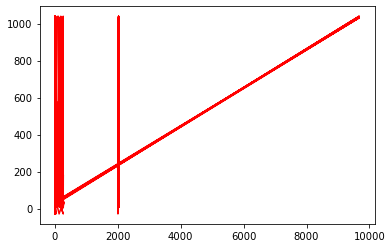

In [88]:
# Valeurs prédites
plt.plot(X_test, y_predicted, color='r')
plt.show()

### Partie 4 Réseaux Neurones 

In [40]:
# Vérifier si Keras est installé (bibliothèque de  réseaux de neurones)
try:
    import keras
    print('Keras est déjà installé.')
except ImportError:
    print("Keras n'est pas installé. Installation en cours...")
    !pip install keras
# Vérifier si TensorFlow est installé (bibliothèque de calcul numérique en Apprentissage profond)
try:
    import tensorflow as tf
    print('TensorFlow est déjà installé.')
except ImportError:
    print("TensorFlow n'est pas installé. Installation en cours...")
    !pip install tensorflow

# Vérifier si les versions de Keras et de TensorFlow sont compatibles
if keras.__version__ != tf.keras.__version__:
    print('Warning: Les versions de  Keras et TensorFlow ne sont pas compatible.')
else:
    print('Keras et TensorFlow sont bien installés et compatibles.')

Keras est déjà installé.
TensorFlow est déjà installé.
Keras et TensorFlow sont bien installés et compatibles.


In [95]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Création du modèle
model = Sequential()
model.add(Dense(10, input_dim=X_train.shape[1], activation='relu')) #  Couche cachée qui contient 10 neurones
model.add(Dense(5, activation='relu')) #  Couche cachée qui contient 10 neurones
model.add(Dense(1, activation='linear')) # Couche de sortie avec un seul neurone (entre 0 et 1)

# Compilation du modèle (fonction model.compile)
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])


In [96]:
# Entraînement du modèle (fonction fit() )
history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_split=0.2)

Epoch 1/10
210294/210294 [==============================] - 205s 974us/step - loss: 124.3043 - accuracy: 4.8504e-05 - val_loss: 85.3407 - val_accuracy: 4.1846e-05
Epoch 2/10
210294/210294 [==============================] - 208s 991us/step - loss: 93.1055 - accuracy: 4.8979e-05 - val_loss: 72.1412 - val_accuracy: 5.3259e-05
Epoch 3/10
210294/210294 [==============================] - 206s 980us/step - loss: 92.8493 - accuracy: 4.8979e-05 - val_loss: 78.5710 - val_accuracy: 5.3259e-05
Epoch 4/10
210294/210294 [==============================] - 209s 993us/step - loss: 73.5063 - accuracy: 4.8979e-05 - val_loss: 71.7793 - val_accuracy: 5.3259e-05
Epoch 5/10
210294/210294 [==============================] - 210s 998us/step - loss: 73.4755 - accuracy: 4.8979e-05 - val_loss: 75.4545 - val_accuracy: 5.3259e-05
Epoch 6/10
210294/210294 [==============================] - 209s 995us/step - loss: 72.4178 - accuracy: 4.8979e-05 - val_loss: 66.8320 - val_accuracy: 5.3259e-05
Epoch 7/10
210294/210294 [=

In [97]:
# Evaluation du modèle 
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Taux de perte :', test_loss)
print('Taux de classification :', test_acc)

20537/20537 [==============================] - 17s 804us/step - loss: 61.8364 - accuracy: 5.9346e-05
Taux de perte : 61.83640670776367
Taux de classification : 5.934555520070717e-05
